In [2]:
import numpy as np
import pandas as pd

## Criando DataFrames com dicionários

In [3]:
primeiro_df = pd.DataFrame({'uva':[10,11],'banana':[10,5]}, index = ['estoque','preco'])

In [4]:
primeiro_df

,uva,banana
estoque,10,10
preco,11,5


## Criando Series e puxando elas de dataframes


In [5]:
primeira_series = pd.Series(['preço1','preço2','preço3','preço4'], index = ['banana','dino','camelo','humano'], name = 'tabela_de_preços')

In [6]:
primeira_series

banana    preço1
dino      preço2
camelo    preço3
humano    preço4
Name: tabela_de_preços, dtype: object

In [7]:
primeira_series

banana    preço1
dino      preço2
camelo    preço3
humano    preço4
Name: tabela_de_preços, dtype: object

## Lendo dados e salvando

In [16]:
dados = pd.read_csv('dados/vinho_notas.csv', index_col = 0)

In [17]:
dados.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [18]:
dados['points'].unique

<bound method Series.unique of 0         96
1         96
2         96
3         96
4         95
          ..
150925    91
150926    91
150927    91
150928    90
150929    90
Name: points, Length: 150930, dtype: int64>

<AxesSubplot:ylabel='Frequency'>

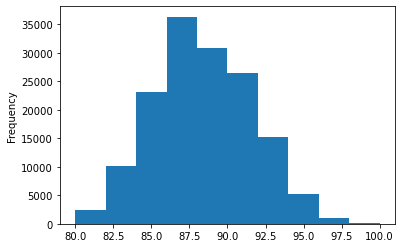

In [19]:
dados['points'].plot(kind = 'hist')

## Seleção padrão coluna-index: 

In [21]:
dados['price']

0         235.0
1         110.0
2          90.0
3          65.0
4          66.0
          ...  
150925     20.0
150926     27.0
150927     20.0
150928     52.0
150929     15.0
Name: price, Length: 150930, dtype: float64

In [22]:
dados['price'][1]

110.0

In [75]:
#varias colunas de uma vez
dados[['points','price']]

,points,price
0,96,235.0
1,96,110.0
2,96,90.0
3,96,65.0
4,95,66.0
...,...,...
150925,91,20.0
150926,91,27.0
150927,91,20.0
150928,90,52.0


## Selecionando com o ILOC 

Selecionando Linhas:

In [20]:
dados.iloc[0]

country                                                       US
description    This tremendous 100% varietal wine hails from ...
designation                                    Martha's Vineyard
points                                                        96
price                                                      235.0
province                                              California
region_1                                             Napa Valley
region_2                                                    Napa
variety                                       Cabernet Sauvignon
winery                                                     Heitz
Name: 0, dtype: object

O iloc e o loc selecionam primeiro a linha para depois selecionar a coluna:

In [25]:
#quero os dados da linha 0 até a quarta da coluna de posição 0
dados.iloc[0:5,0]

0        US
1     Spain
2        US
3        US
4    France
Name: country, dtype: object

In [26]:
#quero os dados da linha 3 até a 4 da coluna 2
dados.iloc[3:5,2]

3       Reserve
4    La Brûlade
Name: designation, dtype: object

In [29]:
#quero os dados pares da linha 0 até a 10 da coluna 0
dados.iloc[0:10:2,0]

0        US
2        US
4    France
6     Spain
8        US
Name: country, dtype: object

In [73]:
#o loc por sua vez usa o nome das colunas ao invés da posição
#obs: ela vê os indíces também como strings, porém nesse caso coincide
dados.loc[0:5,'country']

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,Brasil,150930,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Brasil,150929,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,Brasil,150928,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,Brasil,150927,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,Brasil,150926,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Brasil,150925,Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia


## Brincando com o dataset

In [46]:
dados_new1 = dados.set_index("designation")

In [47]:
dados_new1.head()

,country,description,points,price,province,region_1,region_2,variety,winery
designation,,,,,,,,,
Martha's Vineyard,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
Carodorum Selección Especial Reserva,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
Special Selected Late Harvest,US,Mac Watson honors the memory of a wine once ma...,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
Reserve,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
La Brûlade,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [49]:
dados_new1.loc["Carodorum Selección Especial Reserva":"La Brûlade", 'points']

designation
Carodorum Selección Especial Reserva    96
Special Selected Late Harvest           96
Reserve                                 96
La Brûlade                              95
Name: points, dtype: int64

## Seleção com condição (LOC)

In [50]:
dados.country == 'US'

0          True
1         False
2          True
3          True
4         False
          ...  
150925    False
150926    False
150927    False
150928    False
150929    False
Name: country, Length: 150930, dtype: bool

In [52]:
#dados.lod[condição desejada]
dados.loc[dados.country == 'US']

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
...,...,...,...,...,...,...,...,...,...,...
150892,US,"A light, earthy wine, with violet, berry and t...",Coastal,82,10.0,California,California,California Other,Merlot,Callaway
150896,US,"Some raspberry fruit in the aroma, but things ...",NaN,82,10.0,California,California,California Other,Pinot Noir,Camelot
150914,US,"Old-gold in color, and thick and syrupy. The a...",Late Harvest Cluster Select,94,25.0,California,Anderson Valley,Mendocino/Lake Counties,White Riesling,Navarro
150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer


In [56]:
dados.loc[(dados.country == 'US') & (dados.points == 96)]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
2438,US,This wine from Jordan Fiorentini is a stunning...,Block B Paderewski Vineyard,96,90.0,California,Paso Robles,Central Coast,Syrah,Epoch Estate Wines
2439,US,This is possibly the most savory rendition of ...,Estate,96,40.0,California,San Luis Obispo County,Central Coast,Syrah,Stolo
...,...,...,...,...,...,...,...,...,...,...
144495,US,"So good, it makes you want to shout. Possesses...",Scion,96,50.0,California,Alexander Valley,Sonoma,Cabernet Blend,Robert Young
144868,US,This flamboyant wine is drenched in new oak th...,Late Harvest Wine,96,75.0,California,Napa Valley,Napa,White Blend,Dolce
144869,US,"Classic Napa Cab, right up there with the grea...",Cask 23,96,150.0,California,Napa Valley,Napa,Cabernet Sauvignon,Stag's Leap Wine Cellars
145673,US,"Complex aromas of cassis, dough, espresso, bac...",Reserve,96,60.0,California,Napa Valley,Napa,Cabernet Sauvignon,Lewis


In [57]:
dados.loc[(dados.country == 'US') | (dados.points == 96)]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
...,...,...,...,...,...,...,...,...,...,...
150892,US,"A light, earthy wine, with violet, berry and t...",Coastal,82,10.0,California,California,California Other,Merlot,Callaway
150896,US,"Some raspberry fruit in the aroma, but things ...",NaN,82,10.0,California,California,California Other,Pinot Noir,Camelot
150914,US,"Old-gold in color, and thick and syrupy. The a...",Late Harvest Cluster Select,94,25.0,California,Anderson Valley,Mendocino/Lake Counties,White Riesling,Navarro
150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer


## Mais formas com condições -> Isin, notnull , isnulll 

In [59]:
#condição-> dados que estão dentro das provincias listadas
dados.loc[dados.province.isin(['Oregon','California'])]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
...,...,...,...,...,...,...,...,...,...,...
150892,US,"A light, earthy wine, with violet, berry and t...",Coastal,82,10.0,California,California,California Other,Merlot,Callaway
150896,US,"Some raspberry fruit in the aroma, but things ...",NaN,82,10.0,California,California,California Other,Pinot Noir,Camelot
150914,US,"Old-gold in color, and thick and syrupy. The a...",Late Harvest Cluster Select,94,25.0,California,Anderson Valley,Mendocino/Lake Counties,White Riesling,Navarro
150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer


In [60]:
#condição-> dados que estão dentro da região 2 que não são nulos
dados.loc[dados.region_2.notnull()]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
...,...,...,...,...,...,...,...,...,...,...
150892,US,"A light, earthy wine, with violet, berry and t...",Coastal,82,10.0,California,California,California Other,Merlot,Callaway
150896,US,"Some raspberry fruit in the aroma, but things ...",NaN,82,10.0,California,California,California Other,Pinot Noir,Camelot
150914,US,"Old-gold in color, and thick and syrupy. The a...",Late Harvest Cluster Select,94,25.0,California,Anderson Valley,Mendocino/Lake Counties,White Riesling,Navarro
150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer


In [61]:
#condição-> dados que estão dentro da região 2 que são nulos
dados.loc[dados.region_2.isnull()]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


## Reescrevendo 

In [65]:
dados.iloc[0:7,0] = 'Brasil'

In [66]:
dados.iloc[0:7,0]

0    Brasil
1    Brasil
2    Brasil
3    Brasil
4    Brasil
5    Brasil
6    Brasil
Name: country, dtype: object

In [68]:
dados.head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,Brasil,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Brasil,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,Brasil,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,Brasil,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,Brasil,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Brasil,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Brasil,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [70]:
dados['description'] =  range(len(dados),0,-1)

In [72]:
dados.head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,Brasil,150930,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Brasil,150929,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,Brasil,150928,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,Brasil,150927,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,Brasil,150926,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Brasil,150925,Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Brasil,150924,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,150923,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,150922,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,150921,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
